In [112]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
from shapely.geometry import Point
import seaborn as sns

# MAKING CLEAN SAS CSV, ONLY RUN FIRST TWO IF YOU ALREADY HAVE CLEAN CSV

In [113]:
sas_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\stop_and_search.csv"
shape_path = r'C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\Shapefiles\statistical-gis-boundaries-london\ESRI\LSOA_2011_London_gen_MHW.shp'

In [114]:
df_sas = pd.read_csv(sas_path)
shape = gpd.read_file(shape_path)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18188\872919928.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sas = pd.read_csv(sas_path)


In [120]:
london_boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley",
    "Camden", "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney",
    "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea",
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham",
    "Redbridge", "Richmond upon Thames", "Southwark", "Sutton",
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]


In [7]:
df_sas

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,NaN,NaN
1,1,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN
2,2,Person search,2015-03-31T23:05:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),NaN,Offender given drugs possession warning,NaN,NaN
3,3,Person search,2015-03-31T23:09:00+00:00,NaN,NaN,NaN,NaN,Male,NaN,Not Stated (NS),Black,Misuse of Drugs Act 1971 (section 23),NaN,Nothing found - no further action,NaN,NaN
4,4,Person search,2015-03-31T23:15:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian or Asian British - Any other Asian ethni...,Asian,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671062,1671062,Person and Vehicle search,2024-01-31T23:20:00+00:00,0.0,NaN,NaN,NaN,Female,18-24,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN
1671063,1671063,Person search,2024-01-31T23:28:00+00:00,0.0,NaN,51.595335,-0.003321,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN
1671064,1671064,Person and Vehicle search,2024-01-31T23:34:00+00:00,0.0,NaN,51.534509,-0.145760,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN
1671065,1671065,Person search,2024-01-31T23:47:00+00:00,0.0,NaN,51.509064,-0.130120,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Penalty Notice for Disorder,NaN,NaN


In [8]:
shape

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.680 179824.674, 544766.313 17..."
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18..."
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.630 17..."
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.270, 546320.715 18..."


In [9]:
df_sas = df_sas.drop(columns = ["Part of a policing operation","Policing operation","Outcome linked to object of search","Removal of more than just outer clothing"])
df_sas = df_sas.dropna(subset=['Latitude'])

In [12]:
# Read the CSV data
df_sas = pd.read_csv(sas_path)

# Create a GeoDataFrame from df_sas with the appropriate coordinate system
geometry = [Point(xy) for xy in zip(df_sas['Longitude'], df_sas['Latitude'])]
geo_df_sas = gpd.GeoDataFrame(df_sas, geometry=geometry, crs="EPSG:4326")

# Read the shapefile
shape = gpd.read_file(shape_path)

# If the CRS of shape is different, transform geo_df_sas to match it
if geo_df_sas.crs != shape.crs:
    geo_df_sas = geo_df_sas.to_crs(shape.crs)

# Perform a spatial join to find which borough each point falls into
joined_df = gpd.sjoin(geo_df_sas, shape, how="left", op="within")

# Add the borough name from the 'LAD11NM' attribute to df_sas
df_sas['Borough'] = joined_df['LAD11NM']

# Optionally, you might want to check and handle any points that didn't match a borough
df_sas['Borough'].fillna('Borough not found', inplace=True)

# df_sas now contains an additional column "Borough" with the borough name for each entry


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18328\2124472405.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sas = pd.read_csv(sas_path)
C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [13]:
df_sas

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
0,0,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,NaN,NaN,Borough not found
1,1,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN,Borough not found
2,2,Person search,2015-03-31T23:05:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),NaN,Offender given drugs possession warning,NaN,NaN,Borough not found
3,3,Person search,2015-03-31T23:09:00+00:00,NaN,NaN,NaN,NaN,Male,NaN,Not Stated (NS),Black,Misuse of Drugs Act 1971 (section 23),NaN,Nothing found - no further action,NaN,NaN,Borough not found
4,4,Person search,2015-03-31T23:15:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian or Asian British - Any other Asian ethni...,Asian,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN,Borough not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671062,1671062,Person and Vehicle search,2024-01-31T23:20:00+00:00,0.0,NaN,NaN,NaN,Female,18-24,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Borough not found
1671063,1671063,Person search,2024-01-31T23:28:00+00:00,0.0,NaN,51.595335,-0.003321,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN,Waltham Forest
1671064,1671064,Person and Vehicle search,2024-01-31T23:34:00+00:00,0.0,NaN,51.534509,-0.145760,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN,Camden
1671065,1671065,Person search,2024-01-31T23:47:00+00:00,0.0,NaN,51.509064,-0.130120,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Penalty Notice for Disorder,NaN,NaN,Westminster


In [14]:
# Count of "Borough not found" instances
borough_not_found_count = df_sas['Borough'].value_counts().get('Borough not found', 0)

print("Count of 'Borough not found' instances:", borough_not_found_count)


Count of 'Borough not found' instances: 330865


In [15]:
# Remove rows where 'Borough' is 'Borough not found' or not in list
df_sas = df_sas[df_sas['Borough'] != 'Borough not found']
df_sas = df_sas[df_sas['Borough'].isin(london_boroughs)]


In [16]:
df_sas['Date'] = pd.to_datetime(df_sas['Date'])

# Extract year and month from the 'Date' column
df_sas['year'] = df_sas['Date'].dt.year
df_sas['month'] = df_sas['Date'].dt.month
df_sas['day'] = df_sas['Date'].dt.day
df_sas['hour'] = df_sas['Date'].dt.hour

In [17]:
df_sas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339278 entries, 178930 to 1671066
Data columns (total 21 columns):
 #   Column                                    Non-Null Count    Dtype              
---  ------                                    --------------    -----              
 0   Unnamed: 0                                1339278 non-null  int64              
 1   Type                                      1339278 non-null  object             
 2   Date                                      1339278 non-null  datetime64[ns, UTC]
 3   Part of a policing operation              1339278 non-null  float64            
 4   Policing operation                        0 non-null        float64            
 5   Latitude                                  1339278 non-null  float64            
 6   Longitude                                 1339278 non-null  float64            
 7   Gender                                    1322502 non-null  object             
 8   Age range                       

In [ ]:
df_sas.to_csv("stop_and_search_data_with_borough.csv")

# LOADING CLEAN STOP AND SEARCH

In [115]:
sas_clean_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\stop_and_search_data_with_borough.csv"
df_sas_clean = pd.read_csv(sas_clean_path)

In [116]:
df_sas_clean

,Unnamed: 0.1,Unnamed: 0,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Borough,year,month,day,hour
0,178930,178930,Person search,2016-05-31 23:01:00+00:00,51.455989,-0.043536,Male,10-17,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,Lewisham,2016,5,31,23
1,178931,178931,Person and Vehicle search,2016-05-31 23:05:00+00:00,51.475561,-0.075330,Male,NaN,Not Stated (NS),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,Southwark,2016,5,31,23
2,178932,178932,Person search,2016-05-31 23:07:00+00:00,51.533030,-0.203277,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,Brent,2016,5,31,23
3,178933,178933,Person search,2016-05-31 23:10:00+00:00,51.553184,-0.176043,Male,18-24,Not Stated (NS),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,Camden,2016,5,31,23
4,178934,178934,Person search,2016-05-31 23:10:00+00:00,51.553184,-0.176043,Female,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,Camden,2016,5,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339273,1671061,1671061,Person search,2024-01-31 23:18:00+00:00,51.567236,0.226827,Male,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,Havering,2024,1,31,23
1339274,1671063,1671063,Person search,2024-01-31 23:28:00+00:00,51.595335,-0.003321,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,Waltham Forest,2024,1,31,23
1339275,1671064,1671064,Person and Vehicle search,2024-01-31 23:34:00+00:00,51.534509,-0.145760,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,Camden,2024,1,31,23
1339276,1671065,1671065,Person search,2024-01-31 23:47:00+00:00,51.509064,-0.130120,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Penalty Notice for Disorder,Westminster,2024,1,31,23


## Removing 2024 since not relevant

In [117]:
df_sas_clean = df_sas_clean[df_sas_clean['year'] != 2024]

In [118]:
df_sas_year_bor_count = df_sas_clean.groupby(['Borough', 'year']).size().reset_index(name='Count')

# Display the new DataFrame to confirm it's correctly created
df_sas_year_bor_count

,Borough,year,Count
0,Barking and Dagenham,2016,1683
1,Barking and Dagenham,2017,1908
2,Barking and Dagenham,2018,2146
3,Barking and Dagenham,2019,4678
4,Barking and Dagenham,2020,7282
...,...,...,...
251,Westminster,2019,17699
252,Westminster,2020,17858
253,Westminster,2021,14194
254,Westminster,2022,14882


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

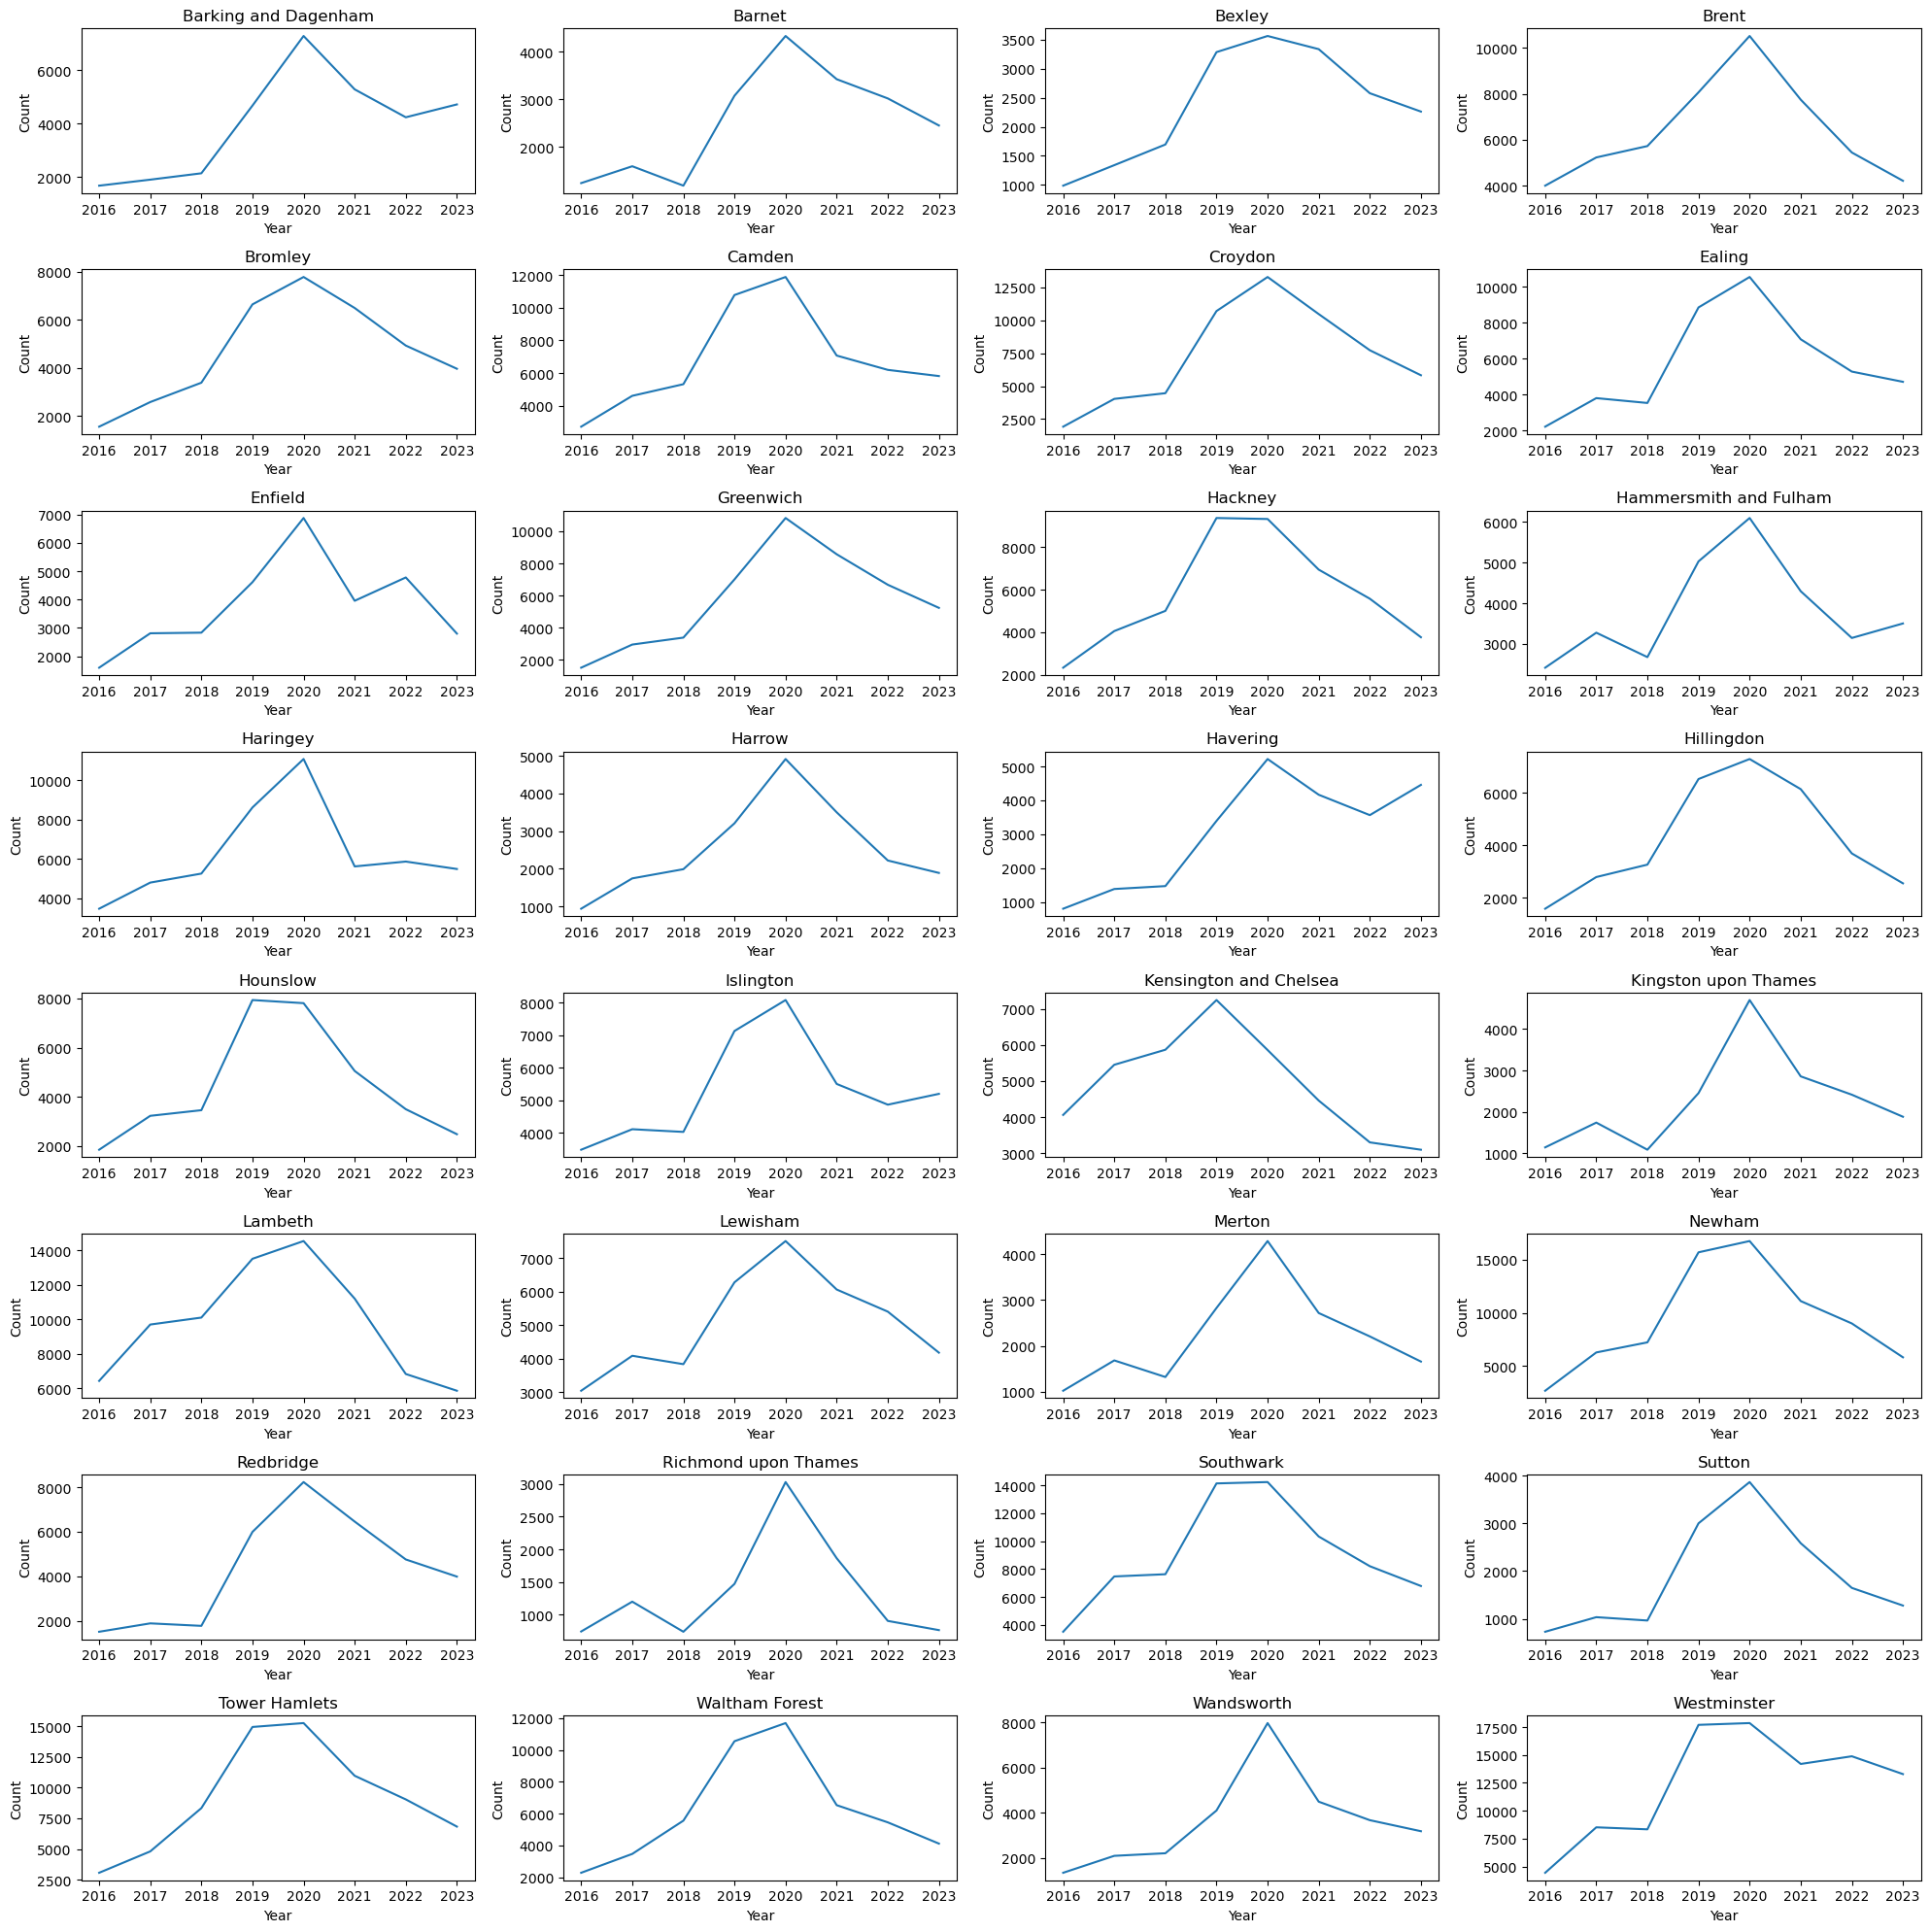

In [121]:
fig, axes = plt.subplots(8, 4, figsize=(20, 20), sharey=False, sharex=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each borough and plot on its respective subplot
for i, borough in enumerate(london_boroughs):
    borough_data = df_sas_year_bor_count[df_sas_year_bor_count['Borough'] == borough]
    ax = axes[i]
    sns.lineplot(data=borough_data, x='year', y='Count', ax=ax)
    ax.set_title(borough)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

In [122]:
# Pivot the dataframe to get counts for each year in separate columns
df_pivot = df_sas_year_bor_count.pivot(index='Borough', columns='year', values='Count').reset_index()

# Calculate the change and percentage change from 2016 to 2023
df_pivot['change'] = df_pivot[2023] - df_pivot[2016]
df_pivot['percentage_change'] = (df_pivot['change'] / df_pivot[2016]) * 100

# Create a new dataframe with the boroughs and their respective percentage changes
df_percentage_change = df_pivot[['Borough', 'percentage_change']]

# Display the resulting dataframe
print(df_percentage_change)

year                 Borough  percentage_change
0       Barking and Dagenham         180.570410
1                     Barnet          98.299595
2                     Bexley         129.280648
3                      Brent           5.292062
4                    Bromley         154.230769
5                     Camden         114.180479
6                    Croydon         202.387130
7                     Ealing         112.652508
8                    Enfield          75.533250
9                  Greenwich         247.343958
10                   Hackney          61.640893
11    Hammersmith and Fulham          45.014481
12                  Haringey          58.287691
13                    Harrow         101.279318
14                  Havering         457.697121
15                Hillingdon          60.855884
16                  Hounslow          34.182015
17                 Islington          49.553957
18    Kensington and Chelsea         -23.798965
19      Kingston upon Thames          64

In [123]:
df_percentage_change["percentage_change"].median(), df_percentage_change["percentage_change"].mean()

(86.72633141836815, 103.48798765193663)

# PAS DATA

In [141]:
pas_path_1 = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\pas_data_ward_level\PAS_ward_level_FY_15_17.csv"
pas_path_2 = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\pas_data_ward_level\PAS_ward_level_FY_17_18.csv"
pas_path_3 = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\pas_data_ward_level\PAS_ward_level_FY_18_19.csv"
pas_path_4 = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\pas_data_ward_level\PAS_ward_level_FY_19_20.csv"
pas_path_5 = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\data\pas_data_ward_level\PAS_ward_level_FY_20_21.csv"

In [142]:
df_pas1 = pd.read_csv(pas_path_1)
df_pas2 = pd.read_csv(pas_path_2)
df_pas3 = pd.read_csv(pas_path_3)
df_pas4 = pd.read_csv(pas_path_4)
df_pas5 = pd.read_csv(pas_path_5)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18188\3828281856.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,35,177,410,411,412,415,416,417,418,419,420,421,422,423) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pas1 = pd.read_csv(pas_path_1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18188\3828281856.py:2: DtypeWarning: Columns (30,31,32,98,99,100,101,102,103,104,105,125,126,127,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pas2 = pd.read_csv(pas_path_2)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18188\3828281856.py:3: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pas3 = pd.read_csv(pas_path_3)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18188\3828281856.py:4: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memor

In [143]:
questions_sas = ["XQ128A", "XQ128C", "XQ128D", "XQ128E", "XQ128G", "XQ128H", "XQ128F", "XQ128AA"]

In [144]:
df_pas1[["Q110","Q114","Q119","NQ119","PQ119","A120","A121"]].dropna()
#Q110 Have you been stopped?
#Q114 Have you been SaS'd or arrested
#Q119 Given the contacts with the police, satisfied?
#NQ119 Before being stopped and searched by police, how was opinion?
#PQ119 After, did opinion change?
#A120 Should police do SaS?
#A121 Do police use SaS fairly in your area?

,Q110,Q114,Q119,NQ119,PQ119,A120,A121
115,Yes,No,Fairly satisfied,Generally high,Better opinion,Strongly agree,Very confident
733,No,Yes,Fairly satisfied,Mixed,Worse opinion,Strongly disagree,Not at all confident
784,Yes,No,Neither satisfied nor dissatisfied,Generally high,Unchanged,Strongly agree,Not very confident
1017,Yes,Yes,Fairly satisfied,Mixed,Unchanged,Tend to agree,Not very confident
1108,Yes,No,Fairly satisfied,Generally high,Unchanged,Strongly agree,Fairly confident
...,...,...,...,...,...,...,...
24832,Yes,No,Fairly dissatisfied,Generally high,Worse opinion,Strongly disagree,Not very confident
25246,Yes,Yes,Fairly satisfied,(spontaneous) No opinion,Unchanged,Strongly agree,Fairly confident
25557,No,Yes,Fairly satisfied,Mixed,Unchanged,Tend to agree,Fairly confident
25628,Yes,No,Completely dissatisfied,Mixed,Worse opinion,Strongly agree,Fairly confident


In [145]:
df_pas2[["ZQ110","ZNQ119","ZPQ119","A120","A121"]].dropna()
#["XQ119A","XQ119B","ZNQ119","ZPQ119"]
#ZQ110 Have you been stopped?
#ZNQ119 Before experience, what were opinions
#ZPQ119 After, how has opinion changed?
#A120 Should police do SaS?
#A121 Do police do SaS fairly in your area

,ZQ110,ZNQ119,ZPQ119,A120,A121
1,Yes,Generally high,Better opinion,Tend to agree,Fairly confident
54,Yes,Generally high,Unchanged,Tend to disagree,Fairly confident
59,Yes,Generally high,Unchanged,Strongly agree,Very confident
98,Yes,(spontaneous) No opinion,Unchanged,Neither agree nor disagree,Not very confident
110,Yes,Generally high,Unchanged,Strongly agree,Not very confident
...,...,...,...,...,...
12552,Yes,Generally high,Better opinion,Strongly agree,Very confident
12556,Yes,Generally low,Unchanged,Tend to agree,Fairly confident
12601,Yes,Mixed,Better opinion,Neither agree nor disagree,Fairly confident
12616,Yes,Generally high,Unchanged,Tend to agree,Not very confident


In [146]:
df_pas3[["ZQ110","ZNQ119","ZPQ119","A120","A121"]].dropna()
#ZQ110 Have you been stopped?
#ZNQ119 Before experience, what were opinions
#ZPQ119 After, how has opinion changed?
#A120 Should police do SaS?
#A121 Do police do SaS fairly in your area

,ZQ110,ZNQ119,ZPQ119,A120,A121
62,Yes,Generally high,Better opinion,Strongly agree,Very confident
122,Yes,Mixed,Unchanged,Tend to agree,Fairly confident
190,Yes,Generally low,Unchanged,Strongly agree,Not very confident
211,Yes,Mixed,Unchanged,Neither agree nor disagree,Not at all confident
387,Yes,Generally high,Better opinion,Strongly agree,Very confident
...,...,...,...,...,...
12712,Yes,Generally high,Unchanged,Neither agree nor disagree,Fairly confident
12732,Yes,Generally high,Unchanged,Strongly agree,Fairly confident
12751,Yes,Generally high,Unchanged,Strongly agree,Very confident
12760,Yes,Generally high,Unchanged,Tend to agree,Fairly confident


In [147]:
df_pas4[["ZQ110","ZNQ119","ZPQ119","XQ128A","XQ128C","XQ128D", "A120","A121"]].dropna()
#ZQ110 Have you been stopped?
#ZNQ119 Before experience, what were opinions
#ZPQ119 After, opinions?
#XQ128A Have you been SaS'd?
#XQ128C Were they polite
#XQ128D Were they respectful
#A120 Agree that police should SaS
#A121 Do police do SaS fairly in your area

,ZQ110,ZNQ119,ZPQ119,XQ128A,XQ128C,XQ128D,A120,A121
256,Yes,Mixed,Unchanged,Yes,Yes,Yes,Tend to agree,Fairly confident
272,Yes,(spontaneous) No opinion,Worse opinion,Yes,No,No,Strongly disagree,Not at all confident
417,Yes,Mixed,Unchanged,Yes,Yes,Yes,Neither agree nor disagree,Fairly confident
748,Yes,Generally high,Unchanged,Yes,Yes,Yes,Strongly agree,Fairly confident
798,Yes,Generally high,Unchanged,Yes,Yes,Yes,Strongly agree,Fairly confident
...,...,...,...,...,...,...,...,...
11971,Yes,(spontaneous) No opinion,Better opinion,Yes,Yes,Yes,Tend to agree,Very confident
11986,Yes,Mixed,Unchanged,Yes,Yes,Yes,Tend to agree,Fairly confident
12032,Yes,Mixed,Unchanged,Yes,Yes,No,Tend to agree,Not very confident
12157,Yes,Generally low,Unchanged,Yes,Yes,Yes,Strongly agree,Very confident


In [148]:
df_pas5[["XQ128A","XQ128C","XQ128D","XQ128E","XQ128F","XQ128A2A","A120","A121"]].dropna()
#XQ128A Have you been SaS'd?
#XQ128C Were they polite?
#XQ128D Were they respectful?
#XQ128E Did they explain why?
#XQ128F Do you know someone who has been SaS
#XQ128A2A How was their experience?
#A120 Agree that police should SaS
#A121 Do police do SaS fairly in your area

,XQ128A,XQ128C,XQ128D,XQ128E,XQ128F,XQ128A2A,A120,A121
3210,Yes,No,Yes,Yes,Yes,Mixed,Strongly agree,Fairly confident
3211,Yes,No,No,Yes,Yes,Mixed,Tend to agree,Not very confident
3243,Yes,No,No,Yes,Yes,Negative,Strongly agree,Not at all confident
3249,Yes,Yes,Yes,Yes,Yes,Mixed,Strongly agree,Fairly confident
3272,Yes,Yes,Yes,No,Yes,Negative,Strongly agree,Not very confident
...,...,...,...,...,...,...,...,...
12647,Yes,Yes,Yes,Yes,Yes,Mixed,Neither agree nor disagree,Not very confident
12648,Yes,Yes,Yes,Yes,Yes,Mixed,Strongly agree,Fairly confident
12649,Yes,No,No,Yes,Yes,Negative,Strongly agree,Not at all confident
12696,Yes,Yes,Yes,Yes,Yes,Positive,Strongly agree,Not very confident


### New coding for questions:
SAS1: Have you been stopped? \
SAS11: Were they polite? \
SAS12: Were they respectful? \
SAS13: Did they explain why? \
SAS14: What was your opinion before being SaS \
SAS15: How did opinion change \
SAS2: Do you know someone that has been SaS'd \
SAS21: What is their opinion? \
SAS3: Should police do SAS? \
SAS31: Do you think they do SaS fairly in your area?


In [149]:
df_pas1 = df_pas1.rename(columns= {"Q114":"SAS1","NQ119":"SAS14","PQ119":"SAS15","A120":"SAS3", "A121":"SAS31"})
#Q114 Have you been SaS'd or arrested
#NQ119 Before being stopped and searched by police, how was opinion?
#PQ119 After, did opinion change?
#A120 Should police do SaS?
#A121 Do police use SaS fairly in your area?

In [150]:
df_pas2 = df_pas2.rename(columns= {"ZQ110":"SAS1","ZNQ119":"SAS14","ZPQ119":"SAS15","A120":"SAS3", "A121":"SAS31"})
#ZQ110 Have you been stopped?
#ZNQ119 Before experience, what were opinions
#ZPQ119 After, how has opinion changed?
#A120 Should police do SaS?
#A121 Do police do SaS fairly in your area

In [151]:
df_pas3 = df_pas3.rename(columns= {"ZQ110":"SAS1","ZNQ119":"SAS14","ZPQ119":"SAS15","A120":"SAS3", "A121":"SAS31"})
#ZQ110 Have you been stopped?
#ZNQ119 Before experience, what were opinions
#ZPQ119 After, how has opinion changed?
#A120 Should police do SaS?
#A121 Do police do SaS fairly in your area

In [152]:
df_pas4 = df_pas4.rename(columns = {"ZNQ119":"SAS14","ZPQ119":"SAS15","A120":"SAS3", "A121":"SAS31", "XQ128A": "SAS1", "XQ128C": "SAS11", "XQ128D": "SAS12"})
#ZQ110 Have you been stopped?
#ZNQ119 Before experience, what were opinions
#ZPQ119 After, opinions?
#XQ128A Have you been SaS'd?
#XQ128C Were they polite
#XQ128D Were they respectful
#A120 Agree that police should SaS
#A121 Do police do SaS fairly in your area

In [153]:
df_pas5 = df_pas5.rename(columns={"ZNQ119":"SAS14","ZPQ119":"SAS15","A120":"SAS3", "A121":"SAS31", "XQ128A": "SAS1", "XQ128C": "SAS11", "XQ128D": "SAS12", "XQ128E": "SAS13", "XQ128F": "SAS2", "XQ128A2A": "SAS21"})
#XQ128A Have you been SaS'd?
#XQ128C Were they polite?
#XQ128D Were they respectful?
#XQ128E Did they explain why?
#XQ128F Do you know someone who has been SaS
#XQ128A2A How was their experience?
#A120 Agree that police should SaS
#A121 Do police do SaS fairly in your area

In [154]:
df_pas1 = df_pas1.rename(columns={"C2":"Borough"})
df_pas2 = df_pas2.rename(columns={"C2":"Borough"})
df_pas3 = df_pas3.rename(columns={"C2":"Borough"})
df_pas4 = df_pas4.rename(columns={"C2":"Borough"})

In [155]:
df_pas2["FinancialYear"] = "2017/18"
df_pas3["FinancialYear"] = "2018/19"
df_pas4["FinancialYear"] = "2019/20"
df_pas5["FinancialYear"] = "2020/21"

In [159]:
df_pas_sas1 = df_pas1[["FinancialYear","Borough","SAS1","SAS14","SAS15","SAS3","SAS31"]]

In [160]:
df_pas_sas2 = df_pas2[["FinancialYear","Borough","SAS1","SAS14","SAS15","SAS3","SAS31"]]

In [161]:
df_pas_sas3 = df_pas3[["FinancialYear","Borough","SAS1","SAS14","SAS15","SAS3","SAS31"]]

In [162]:
df_pas_sas4 = df_pas4[["FinancialYear","Borough","SAS14","SAS15","SAS3","SAS31","SAS1","SAS11","SAS12"]]

In [163]:
df_pas_sas5 = df_pas5[["FinancialYear","Borough","SAS3","SAS31","SAS1","SAS11","SAS12","SAS13","SAS2","SAS21"]]

In [164]:
df_pas_sas = pd.concat([df_pas_sas1, df_pas_sas2, df_pas_sas3, df_pas_sas4, df_pas_sas5], ignore_index=True)

In [165]:
df_pas_sas[df_pas_sas["SAS1"] == "Yes"]

,FinancialYear,Borough,SAS1,SAS14,SAS15,SAS3,SAS31,SAS11,SAS12,SAS13,SAS2,SAS21
56,2015/16,Kensington and Chelsea,Yes,Generally high,Unchanged,Tend to agree,Fairly confident,NaN,NaN,NaN,NaN,NaN
421,2015/16,Hackney,Yes,Mixed,Unchanged,Tend to agree,Fairly confident,NaN,NaN,NaN,NaN,NaN
436,2015/16,Hackney,Yes,Mixed,Better opinion,Strongly agree,Fairly confident,NaN,NaN,NaN,NaN,NaN
733,2015/16,Redbridge,Yes,Mixed,Worse opinion,Strongly disagree,Not at all confident,NaN,NaN,NaN,NaN,NaN
809,2015/16,Redbridge,Yes,Mixed,Unchanged,Strongly agree,Fairly confident,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
76353,2020/21,Waltham Forest,Yes,NaN,NaN,Strongly agree,Fairly confident,Yes,Yes,Yes,No,NaN
76358,2020/21,Barking & Dagenham,Yes,NaN,NaN,Strongly agree,Not very confident,Yes,Yes,Yes,Yes,Positive
76362,2020/21,Bromley,Yes,NaN,NaN,Tend to agree,Not very confident,No,No,Yes,Yes,Positive
76373,2020/21,Haringey,Yes,NaN,NaN,Neither agree nor disagree,Fairly confident,Yes,Yes,Yes,No,NaN


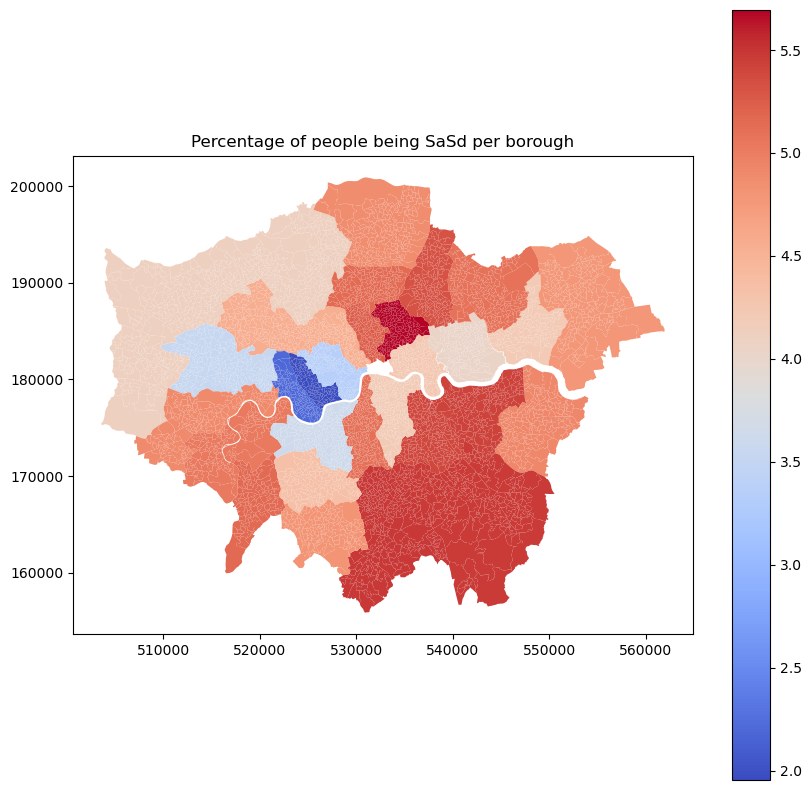

In [166]:
count_df = df_pas_sas.groupby(['Borough', 'SAS1']).size().unstack(fill_value=0)
count_df['Total'] = count_df['Yes'] + count_df['No']
count_df['Percentage_Yes'] = (count_df['Yes'] / count_df['Total']) * 100

# Create the final DataFrame with the desired information
sas_count_in_pas = count_df[['Total', 'Percentage_Yes']].reset_index()

# Ensure the 'Borough' column in sas_count_in_pas matches the 'LAD11NM' column in the GeoDataFrame
# For demonstration, let's assume 'Borough' and 'LAD11NM' have matching names

# Merge the GeoDataFrame with the data DataFrame
merged_gdf = shape.merge(sas_count_in_pas, left_on='LAD11NM', right_on='Borough')

# Plot the map with the percentage of 'Yes' instances
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='Percentage_Yes', cmap='coolwarm', linewidth=0, ax=ax, edgecolor='1', legend=True)

plt.title('Percentage of people being SaSd per borough')
plt.show()

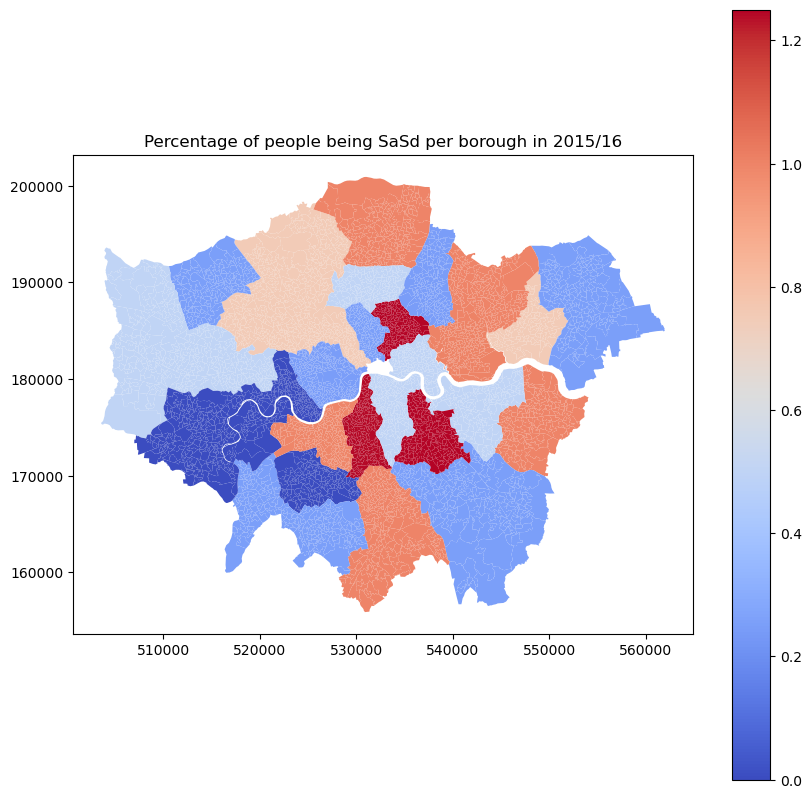

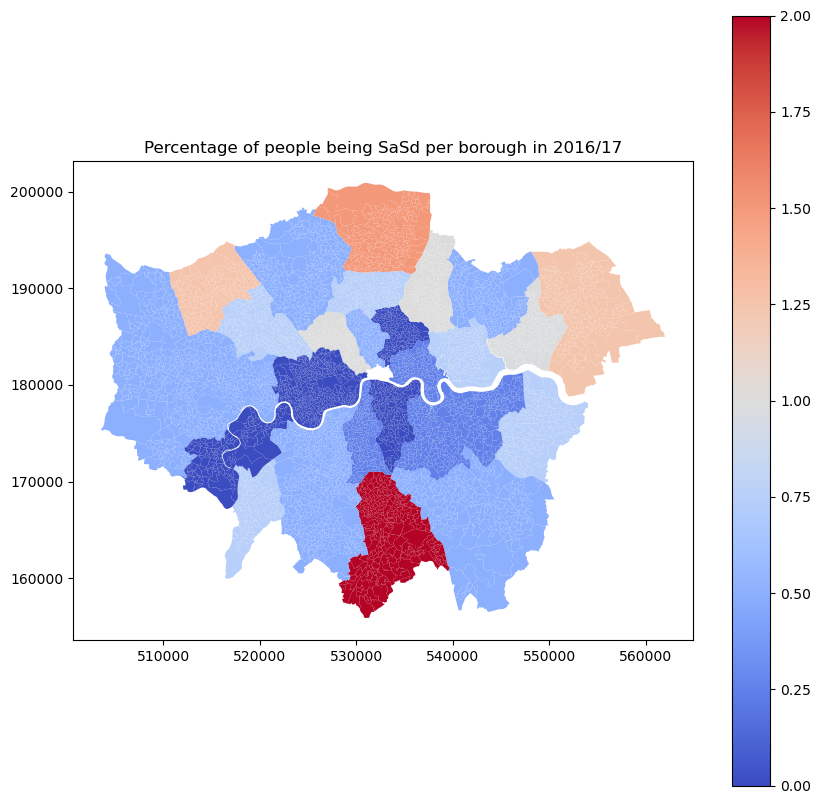

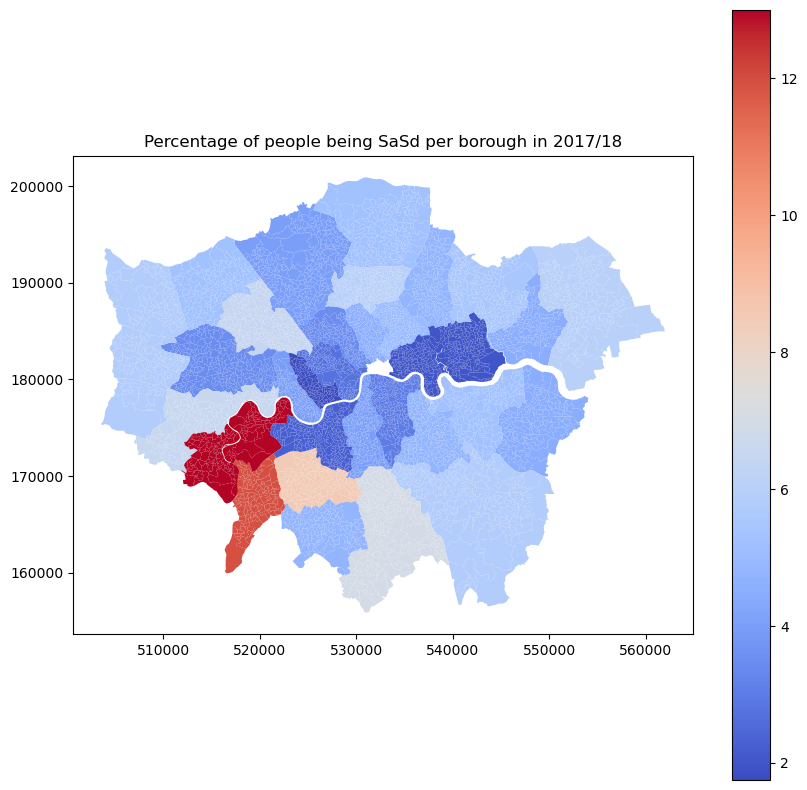

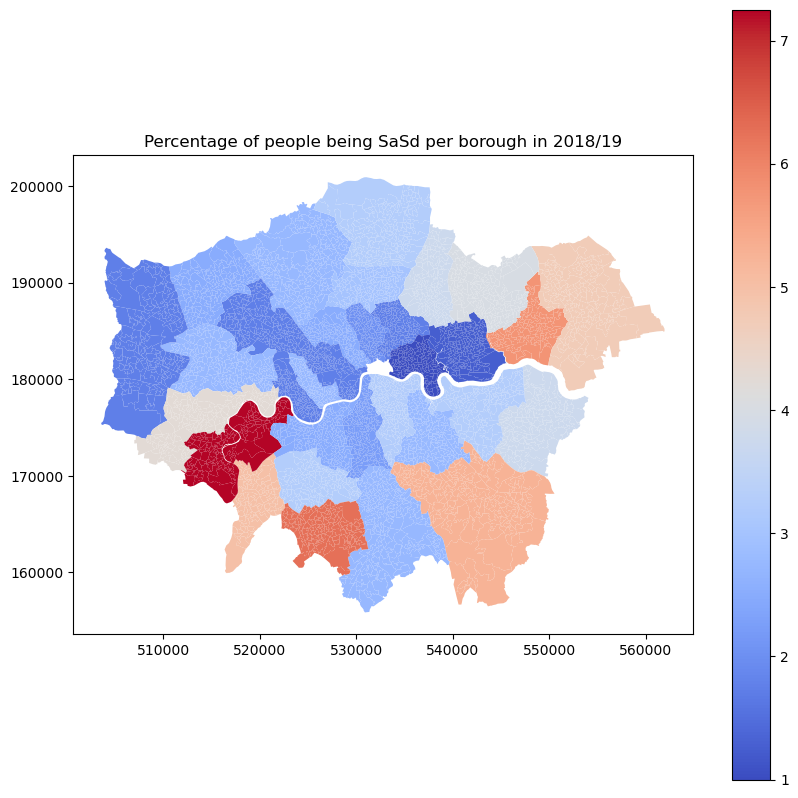

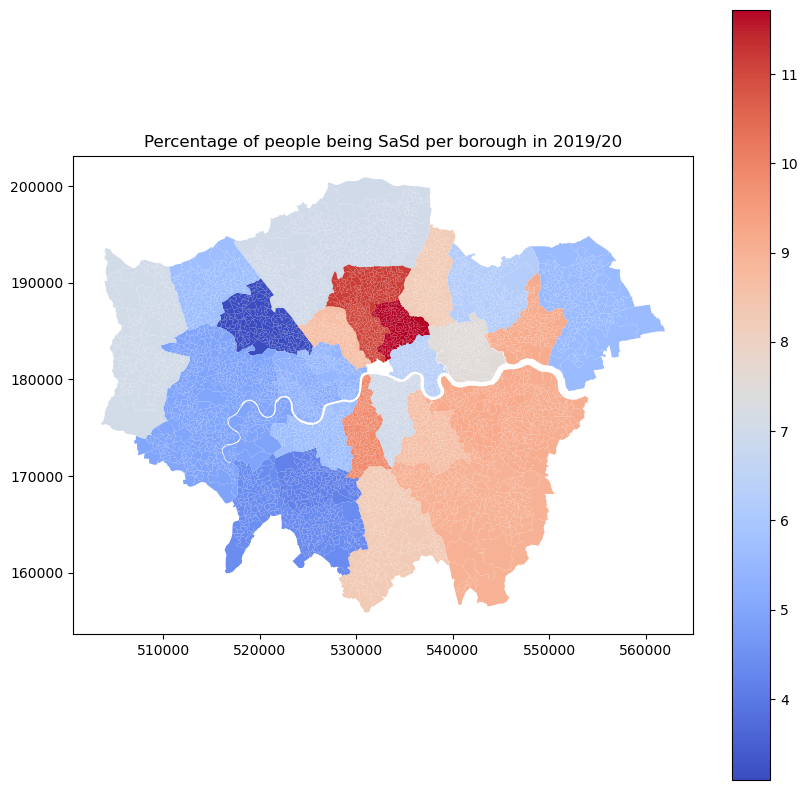

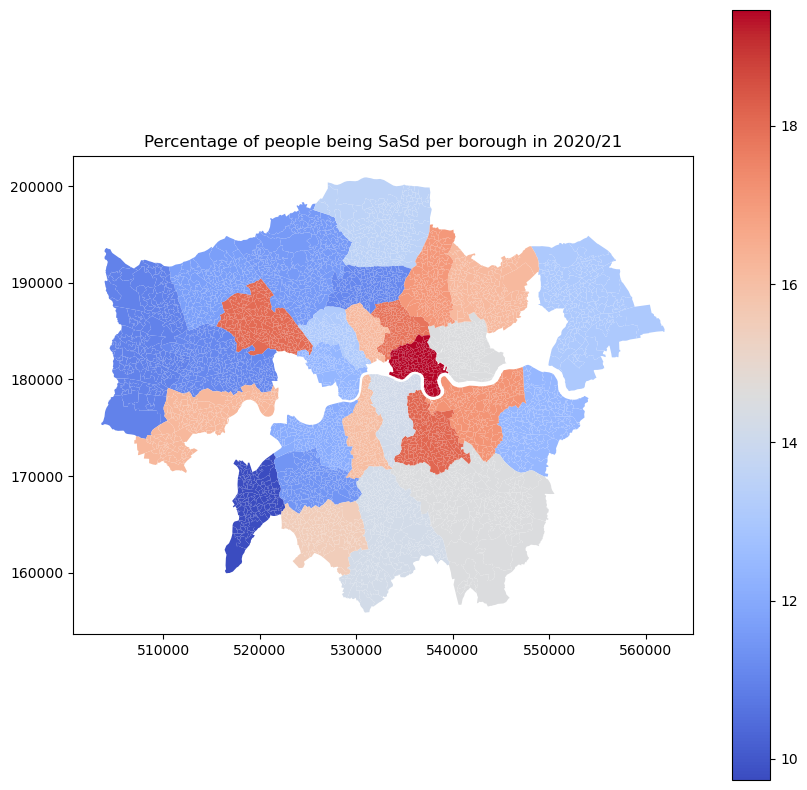

In [167]:
for year in df_pas_sas['FinancialYear'].unique():
    # Filter the DataFrame for the current year
    df_year = df_pas_sas[df_pas_sas['FinancialYear'] == year]

    # Group by Borough and SAS1, count occurrences
    count_df = df_year.groupby(['Borough', 'SAS1']).size().unstack(fill_value=0)
    count_df['Total'] = count_df['Yes'] + count_df['No']
    count_df['Percentage_Yes'] = (count_df['Yes'] / count_df['Total']) * 100

    # Create the final DataFrame with the desired information
    sas_count_in_pas = count_df[['Total', 'Percentage_Yes']].reset_index()

    # Merge the GeoDataFrame with the data DataFrame
    merged_gdf = shape.merge(sas_count_in_pas, left_on='LAD11NM', right_on='Borough')

    # Plot the map with the percentage of 'Yes' instances
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_gdf.plot(column='Percentage_Yes', cmap='coolwarm', linewidth=0, ax=ax, edgecolor='1', legend=True)

    plt.title(f'Percentage of people being SaSd per borough in {year}')
    plt.show()

In [168]:
sas_count_in_pas

SAS1,Borough,Total,Percentage_Yes
0,Barking & Dagenham,298,13.087248
1,Barnet,302,11.589404
2,Bexley,298,12.416107
3,Brent,294,18.027211
4,Bromley,296,14.527027
5,Camden,297,13.131313
6,Croydon,296,14.189189
7,Ealing,297,11.111111
8,Enfield,296,13.513514
9,Greenwich,297,17.171717
